In [1]:
%matplotlib inline
import pylab as plt
import numpy as np
import seaborn as snb

from scipy.stats import binom
from scipy.stats import beta

snb.set_style('darkgrid')
snb.set(font_scale=1.5)
plt.rcParams['lines.linewidth'] = 3


# 02477 Bayesian Machine Learning - Exercise 1

The purpose of this exercise is to become familiar with the core components of Bayesian inference: the **prior**, the **likelihood**, the **posterior** as well as manipulating probabilities. We will also look at various ways to summarize distributions: **posterior mean**, **posterior mode**, **posterior variance**, and **posterior intervals**. We will study these concepts in the context of the Beta-Binomial model. 

One of the main applications of the Beta-Binomial model is to estimate proportions. For example, suppose a website shows a specific ad to $N = 112$ customers and $Y = 13$ of those custumers end up clicking on the ad. A common task is then to estimate the click-rate for this ad in order to answer questions like the following:

1) What is the probability that the next customer will click on the ad?

2) What is the probability that the click-rate is below 10%?

We will see how the Bayesian Beta-Binomial model can be used to answer such questions. Furthermore, we will conclude the exercise by studying a slightly more general version of the problem: Suppose a website has two ads: version A and version B and that version A was shown $N_A$ times and generated $m_A$ clicks, whereas version B was shown $N_B$ times and generated $m_B$ click. What is the probability that the click-rate of version B is larger than click-rate of version A?

The exercise is divided into four parts:

- Part 1: Bayesian inference in the Beta-Binomial model

- Part 2: Posterior summaries

- Part 3: Computing posterior summaries via sampling

- Part 4: Applying the beta-binomial model to A/B testing


We encourage you to discuss your results and conclusions with one of the teachers. This will also prepare you for the oral exam.



# Part 1: Bayesian inference in the Beta-Binomial model

### The Binomial and the Beta distributions

In this exercise, we will work with two common families of probabilities distributions: the Binomial distribution and the Beta distribution. 

The ***Binomial distribution*** is a discrete distribution given by 

$$p(m|N, \mu) = {N\choose m} \mu^{m}(1-\mu)^{N-m},$$

where $N$ is the number of trials, $\mu \in \left[0, 1\right]$ is the probability of success in each individual trial and $m$ is the total number of successes. The quantity ${N\choose m}$ is a called a binomial coefficient and is pronounced "$N$ choose $m$" and counts the number of ways $m$ items can be chosen from a set of $N$ items. 

The ***Beta distribution*** is distribution over random variables in the unit interval [0,1]. The probability density function (PDF) of the beta distribution  has two parameter $a > 0$ and $b > 0$ and is given by

$$p(\mu|a,b) = \frac{1}{B(a,b)}\mu^{a-1}(1-\mu)^{b-1},$$

where $B(a, b)$ is a normalization function that ensures that the density integrates to one. 

That expected value of a Beta-distributed random variable, $\mu \sim \text{Beta}(a, b)$, is given by

$$\mathbb{E}\left[\mu|a, b\right] = \frac{a}{a+b} \tag{1}$$

If needed, you can find more information about both distributions in Section 2.1 in the textbook or on Wikipedia: 

[https://en.wikipedia.org/wiki/Beta_distribution](https://en.wikipedia.org/wiki/Beta_distribution)

[https://en.wikipedia.org/wiki/Binomial_distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

### The Beta-binomial model ###


The beta-binomial model is a Bayesian model for estimating such proportions, where the **likelihood** is the binomial distribution and a Beta distribution is used as a **prior distribution** for the parameter $\mu$. The key equations for the model are given by

\begin{align*}
    p(\mu) &= \text{Beta}(\mu|a_0, b_0)&&\text{(Prior)}\\
    p(m|\mu) &= {N \choose m} \mu^m (1-\mu)^{N-m}&&\text{(Likelihood)}\\
    p(\mu|m) &= \text{Beta}(\mu|a_0 + m, b_0 + N-m)&&\text{(Posterior)}
  \end{align*}


**Questions**


1.0) Describe the role of the prior, the likelihood and the posterior in your own words. 


**Priora**
The prior $p(\mu)$ contains our prior information of the $\mu$ parameter which here is our probability of success.
In that sense it is our belief in a success where we only take our knowledge prior to the data into account. 
This could for instance be expert knowledge from medical experiments that have created some information for us to include in our model without even seeing any data.

**Likelihood**
The likelihood describes the likelihood/probability of the observed data given our prior. 
In other words it decribes how likely our observed data is if we assume that our prior belief is correct.

**Posterior**
Describes the probability of our prior given the data we have observed. 
I.e. it updates our prior belief (probability) based on the observed data.

1.1) The Beta distribution is **conjugate** to the Binomial distribution. Explain in your own words what this means.

It means that the Beta distribution and Binomial distribution are in the same probability families, such that
when you have used the observed data to updated you prior belief to get the posterior distribution.
Then the postirior distribution can now be used as a new prior for the next time you observe new data.


1.2) Suppose we have observed $m = 13$ successes in $N = 112$ trials and suppose we decide to use a Beta prior distribution with parameters $a_0 = 1$ and $b_0 = 1$. Show that resulting posterior is a $\text{Beta}(14, 100)$-distribution.


We have from Bayes' Theorem that:
$$
p(\mu | m) = \frac{p(m|\mu)p(\mu)}{p(m)} \propto p(m | \mu) p(\mu)
$$

Where we can use the propotionality and leave out $p(m)$ since it does not rely on $\mu$.

Then we can focus on the likelihood and prior and insert the Binomial likelihood and the Beta prior distibution to get

\begin{align}
p(m | \mu) p(\mu) = \binom Nm \mu^m (1-\mu)^{N-m} \frac{1}{B(a_0,b_0)} \mu^{a_0-1} (1-\mu)^{b_0-1}
\end{align}

Then by realizing that the N-choose-m and $\frac{1}{B(a_0,b_0)}$ are constants as they do not rely on $\mu$.

Therefore we have a proportionality such that:
\begin{align}
(1) &\propto \mu^m (1-\mu)^{N-m} \mu^{a_0-1}(1-\mu)^{b_0-1} \\
&= \mu^{m + a_0 - 1} (1-\mu)^{N-m+b_0-1}
\end{align}

If we look at the definition of the Beta distribution:
$$
\frac{1}{B(a_0,b_0)} \mu^{a_0 - 1} (1 - \mu)^{b_0 - 1}
$$
we recognize it in (2), but just without $\frac{1}{B(a_0,b_0)}$ which is a proportionality constant, since it does not rely on $\mu$.

And so we have:
$$
\mu^{m + a_0 - 1} (1-\mu)^{N-m+b_0-1} \propto Beta(\mu | m + a_0, N - m + b_0)
$$
With  $\frac{1}{B(a_0,b_0)}$ as the proportionality constant.

If we then plot in the information we have gotten we see that:
\begin{align}
m + a_0 = 14 \\
N-m+b_0 = 100
\end{align}

And so the postirior distribution becomes a Beta(14,100)-distribution.

1.3) Explain why $a_0$ and $b_0$ can be interpreted as ***pseudo observations***?



The fraction of $a_0$ and $b_0$ in the Beta-distribution model describes the fraction of successes.
But if we don't have any observations and instead rely on some other information then $a_0$ and $b_0$ are pseudo, since we have not aquired them through observation.
E.g. if we read some research papers that have found that coin flips with our type of coin produces heads (success) 75\% of the time then we could use their results to inform us
and thereby se $a_0 = 3$ and $b_0 = 1$.


1.4) Compute the ***prior mean*** and ***posterior mean*** of $\mu$ for this example.


In [4]:
a0 = 1
b0 = 1
N = 112
m = 13

# Prior mean
E_prior = a0/(a0+b0)

# Posterior mean
a = a0 + m
b = b0 + N - m
E_post  = a/(a+b)

print(f'Prior mean: {E_prior}')
print(f'Posterior mean: {E_post}')

Prior mean: 0.5
Posterior mean: 0.12280701754385964


1.5) **Optional** Show that the posterior mean converges to the maximum likelihood estimate $\hat{\mu}_{ML} = \frac{m}{N}$ as $N \rightarrow \infty$


Hints: 
- Write the posterior mean as a function of $a_0, b_0, N, m$
- Write the number of successes as $m = \hat{\mu}_{ML} N$ and substitute it into the expression for the posterior mean



The cell below provides a simple implementation of the Bayesian Beta-Binomial model as well as a function for visualizing the densities:

In [12]:
class BetaBinomialModel(object):
    
    def __init__(self, a0=1, b0=1, N=0, m=0):
        self.a0, self.b0 = a0, b0
        self.set_observations(N, m)
        
    def set_observations(self, N, m):
        self.N, self.m = N, m
        self.a = self.a0 + self.m
        self.b = self.b0 + self.N - self.m        
        return self

    def compute_prior_mean(self):
        return self.a0/(self.a0+self.b0)
        
    def compute_mean(self):
        return self.a/(self.a + self.b)
    
    def compute_mode(self):
        if self.a > 1 and self.b > 1:
            return (self.a - 1)/(self.a + self.b - 2)
        else:
            return np.NaN
    
    def compute_interval(self, interval_size):
        mu_lower = beta.ppf((1-interval_size)/2, self.a, self.b)
        mu_upper = beta.ppf(1-(1-interval_size)/2, self.a, self.b)
        return mu_lower, mu_upper
        
    def generate_samples(self, sample_size=10000):
        return beta.rvs(a=self.a, b=self.b, size=sample_size)

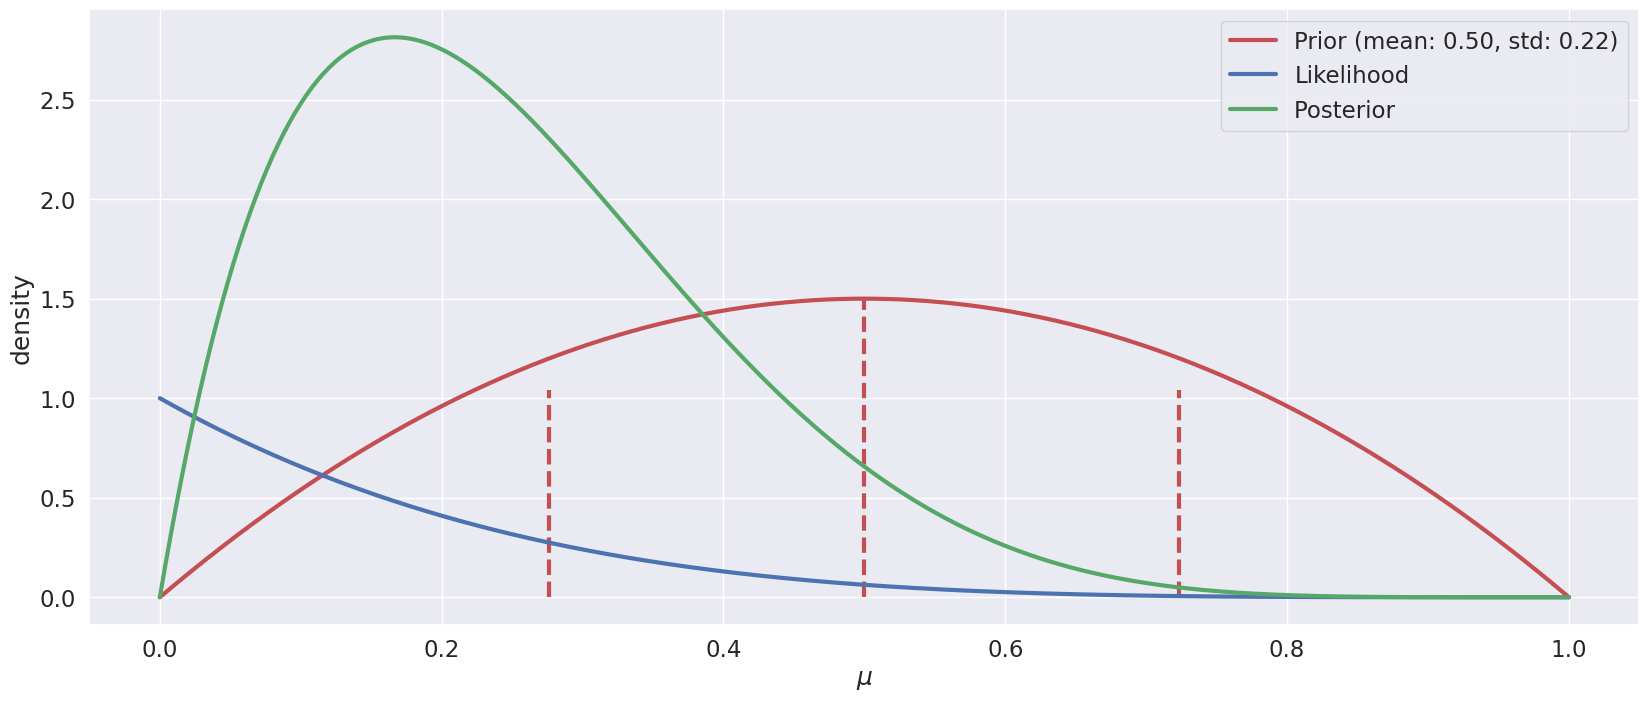

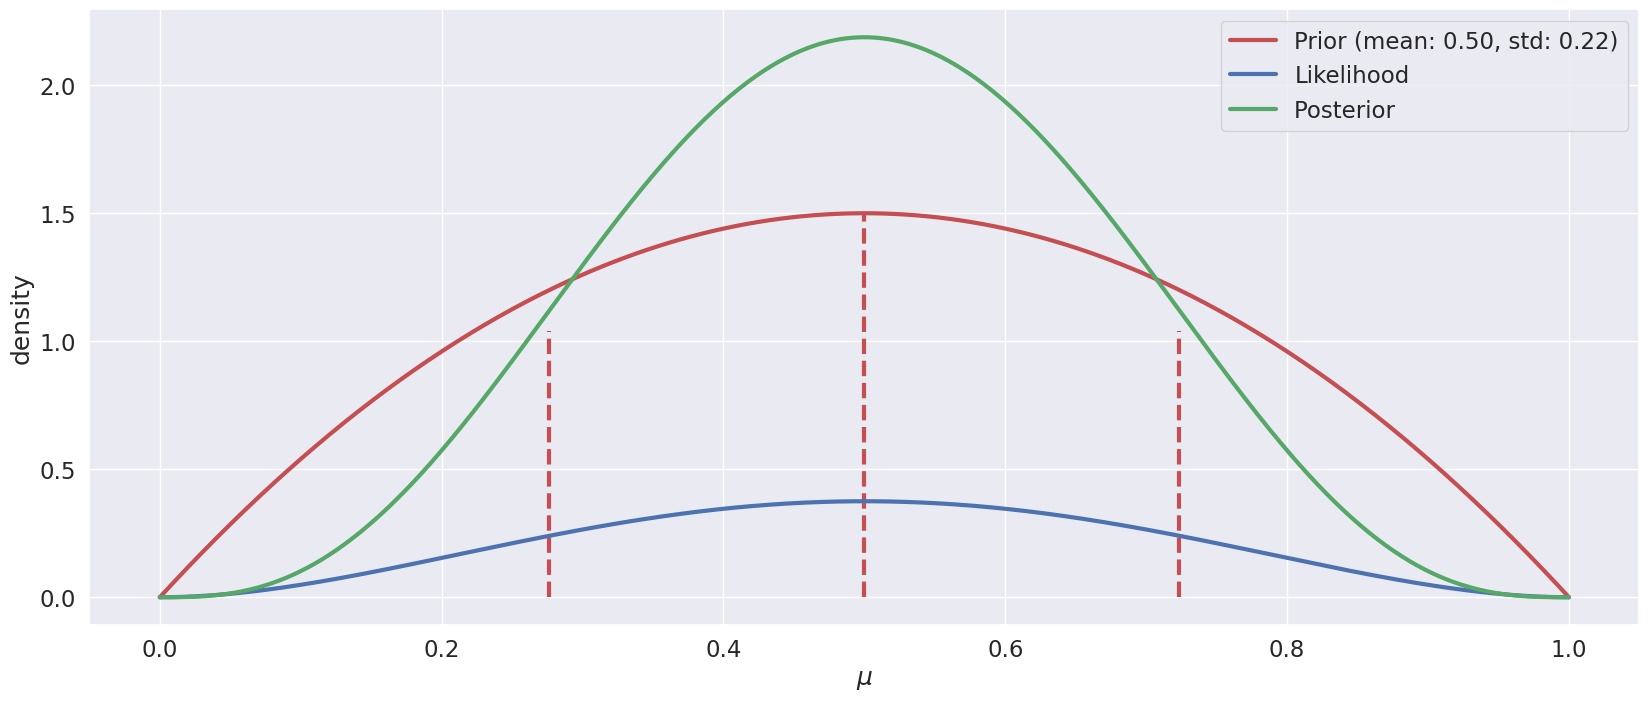

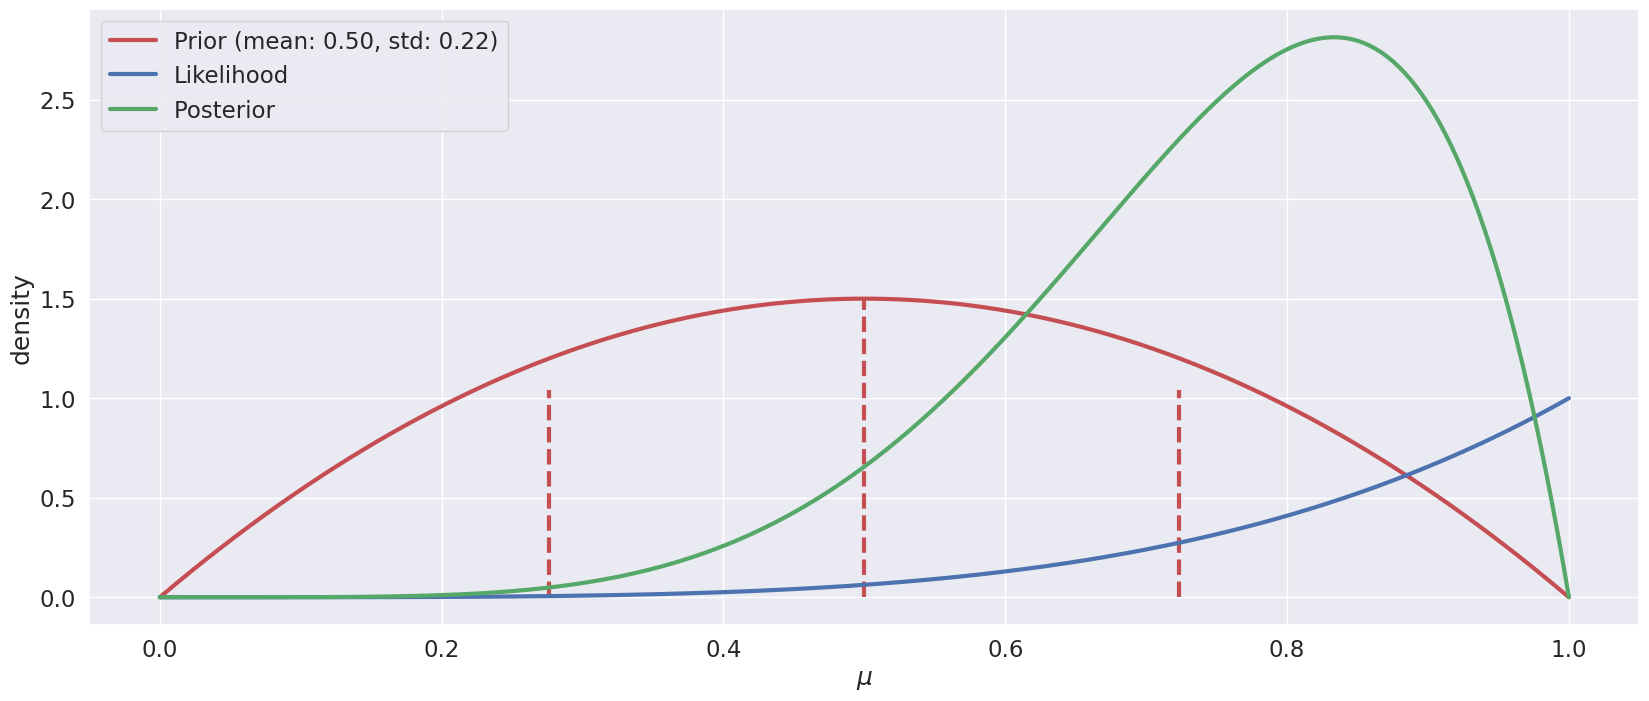

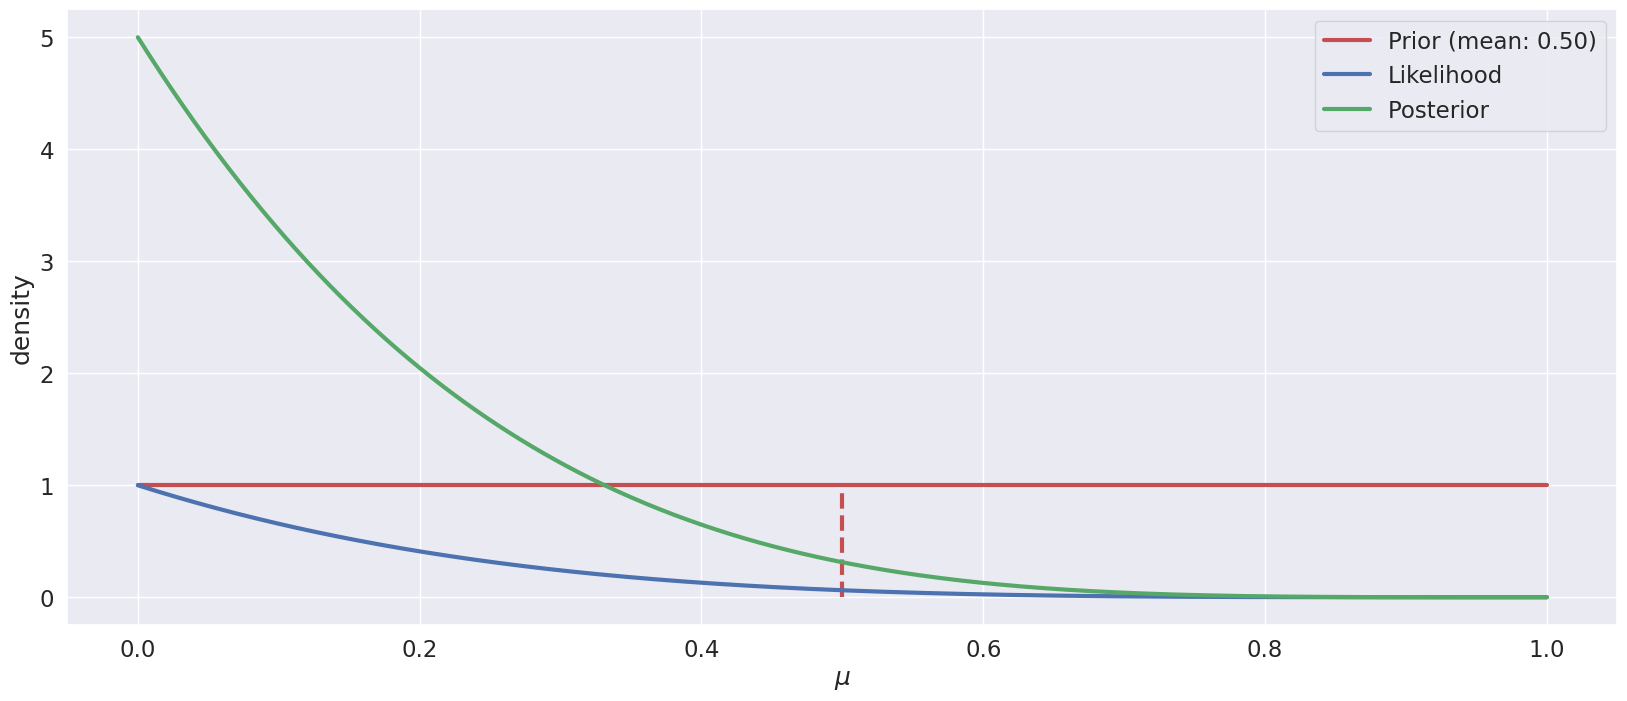

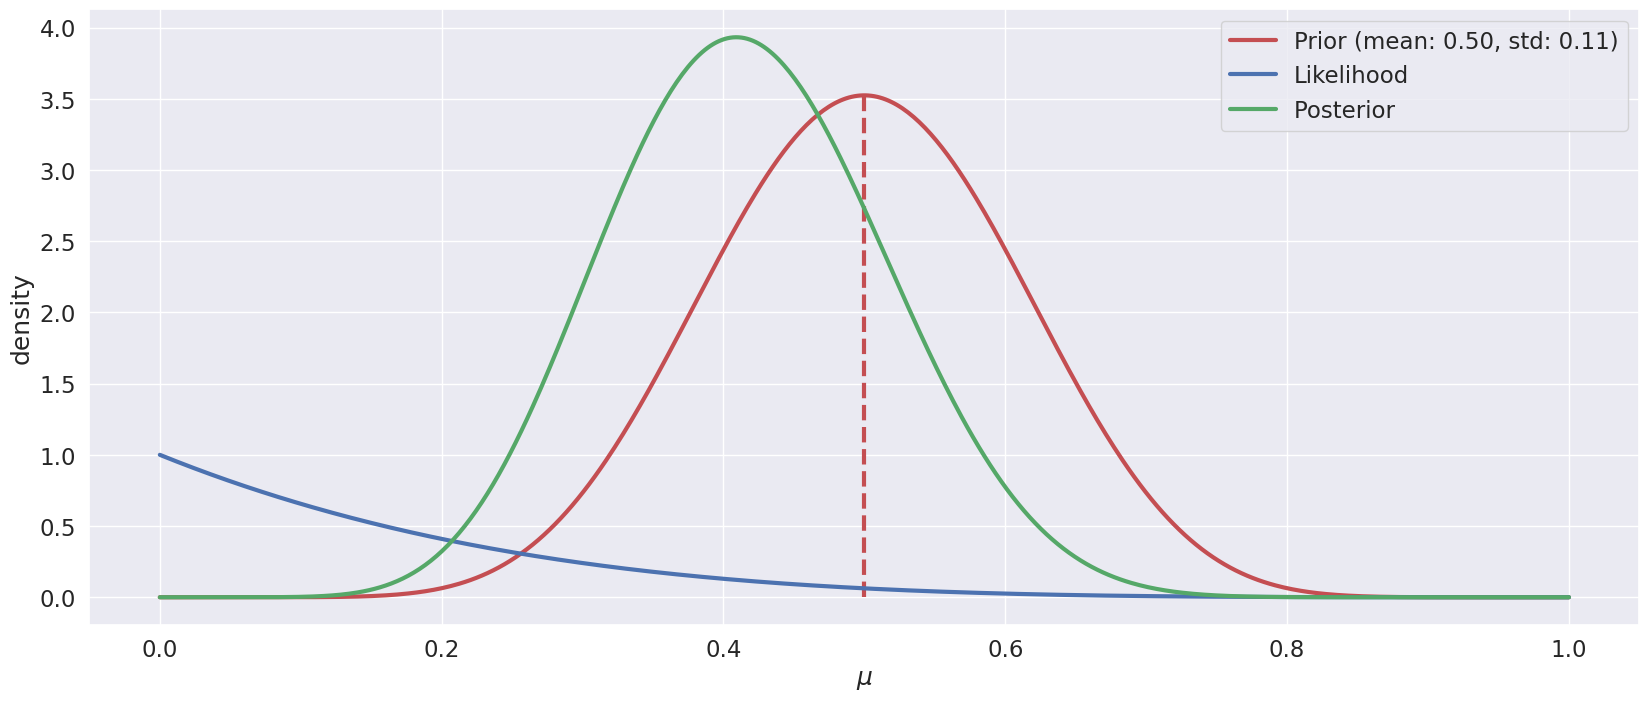

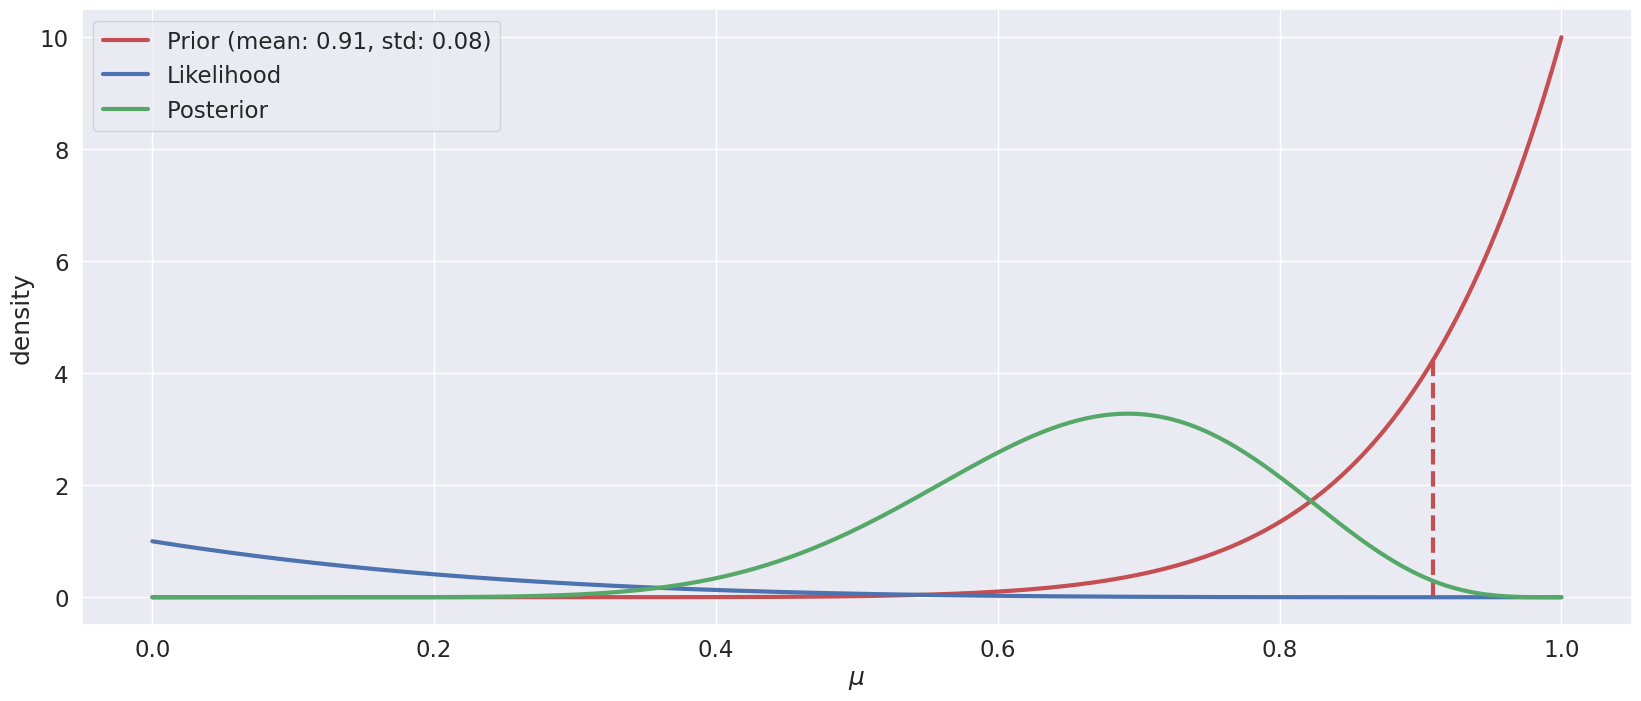

In [36]:
def visualize(model, posterior=True, likelihood=False, prior=False, color='g', label='', interval=None, ax=None):
    
    mu_values = np.linspace(0, 1, 500)
    
    # plot
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(20, 8))
        
    if prior:
        prior_mean = model.compute_prior_mean()
        prior_mean_pdf = beta.pdf(prior_mean, model.a0, model.b0)
        prior_pdf = beta.pdf(mu_values, model.a0, model.b0)
        ax.vlines([prior_mean], ymin=0, ymax=prior_mean_pdf, color='r', linestyle='--')

        if (model.a0 != 1 or model.b0 != 1):
            prior_std = np.sqrt((model.a0*model.b0)/((model.a0+model.b0)**2 * (model.a0 + model.b0 + 1)))
            prior_std_pdf = beta.pdf(prior_std, model.a0, model.b0)
            ax.plot(mu_values, prior_pdf, 'r', label=f'Prior (mean: {prior_mean:.2f}, std: {prior_std:.2f})')
            ax.vlines([prior_mean-prior_std], ymin=0, ymax=prior_std_pdf, color='r', linestyle='--')
            ax.vlines([prior_mean+prior_std], ymin=0, ymax=prior_std_pdf, color='r', linestyle='--')
        else:
            ax.plot(mu_values, prior_pdf, 'r', label=f'Prior (mean: {prior_mean:.2f})')

        
    if likelihood:
        likelihood = binom.pmf(model.m, n=model.N, p=mu_values)
        ax.plot(mu_values, likelihood, 'b', label='Likelihood')
    
    if posterior:
        posterior_pdf = beta.pdf(mu_values, model.a, model.b)
        ax.plot(mu_values, posterior_pdf, color=color, label='Posterior ' + label)
        
    ax.set(xlabel='$\mu$', ylabel='density')
    
    # summary stats
    if interval is not None:
        mean = model.compute_mean()
        lower, upper = model.compute_interval(interval)
        interval_idx = np.logical_and(mu_values > lower, mu_values <= upper)           
        ax.axvline(mean, label='Posterior mean', linestyle='--', color='g')
        ax.fill_between(mu_values[interval_idx], posterior_pdf[interval_idx], color='g', alpha=0.2, label=f'{interval*100:2.1f}%-credibility interval')
        
    ax.legend()
    
# create model instance and visualize
model = BetaBinomialModel(a0=2, b0=2, N=4, m=0)
visualize(model, posterior=True, likelihood=True, prior=True)

model = BetaBinomialModel(a0=2, b0=2, N=4, m=2)
visualize(model, posterior=True, likelihood=True, prior=True)

model = BetaBinomialModel(a0=2, b0=2, N=4, m=4)
visualize(model, posterior=True, likelihood=True, prior=True)

model = BetaBinomialModel(a0=1, b0=1, N=4, m=0)
visualize(model, posterior=True, likelihood=True, prior=True)

model = BetaBinomialModel(a0=10, b0=10, N=4, m=0)
visualize(model, posterior=True, likelihood=True, prior=True)

model = BetaBinomialModel(a0=10, b0=1, N=4, m=0)
visualize(model, posterior=True, likelihood=True, prior=True)

The cell above plots the prior, likelihood and posterior for the beta-binomial model with $a_0 = 2, b_0 = 2, N = 4, m = 0$.

***Questions***

1.6) Explain how we can interpret the posterior as a compromise between the prior and likelihood

1.7) Describe what happens if you change the prior to $a_0 = b_0 = 1$? to $a_0 = b_0 = 10$? to $a_0 = 10, b_0 = 1$?

1.8) ***Optional*** Show that the posterior mean is always between the prior mean, $\mu_0 = \frac{a_0}{a_0 + b_0}$, and the maximum likelihood estimate $\hat{\mu}_{ML} = \frac{m}{N}$.

Hints:
- Show that the posterior mean can be written as 

$$
\begin{align*}
\mathbb{E}\left[\mu|m\right] = (1-\lambda) \mu_0 + \lambda \hat{\mu}_{ML}
\end{align*}
$$
for some $0 \leq \lambda \leq 1$.

**1.6**

The prior describes our belief of the distribution over the variable $\mu$ without taking observations into account and the likelihood is the probability of seeing the observations that we do assuming that our prior belief is correct. Thereby when we multiply the prior and likelihood you could say that the likelihood pulls the prior in the direction of what is likely according the the data observed.

If we look at the plot we see that the product of the likelihood and prior does not give the posterior, but this is because we work with proportional sizes.

**1.7**
We can look at the Beta-distribution:
$$
\frac{1}{B(a_0,b_0)} \mu^{a_0 - 1} (1 - \mu)^{b_0 - 1}
$$

For the prior $a_0 = b_0 = 1$. We have a prior distribution as: $Beta(\mu | a_0=1, b_0=1) = \frac{1}{B(1,1)} \mu^{0} (1 - \mu)^{0} = \frac{1}{B(1,1)}$.
<br>
So we actually do not have any success or failure information. Instead all we have left is the proportionality coefficient which is constant, and gives us the flat prior at 1 since the probability ditribution must integrate to 1.


For $a_0 = b_0 = 10$ we have the Beta-distribution:
$$
\frac{1}{B(10,10)} \mu^{9} (1-\mu)^{9}
$$
Which is not a constant. This gives us the expectation of the prior as:
$$
E[\mu] = \frac{a_0}{a_0+b_0} = \frac{10}{20} = 0.5
$$
Now we can also look at the variance of the beta which is:
$$
Var[\mu] = \frac{a_0 b_0}{(a_0 + b_0)^2 (a_0 + b_0 + 1)} = \frac{1}{84}
$$
Leading to a standard deviation of 0.11.

For $a_0 = 10$ and $b_0 = 1$ we get:
$$
\frac{1}{B(10,1)} \mu^{9} (1-\mu)^{0} = \frac{1}{B(10,1)} \mu^{9}
$$
So no failures only looking at successes. Which gives
$$
E[\mu] = \frac{10}{11} = 0.91
$$
and
$$
Var[\mu] = \frac{10}{1452} = 0.0069
$$
Giving the standard deviation 0.08.

# Part 2: Posterior summaries

The posterior distribution of $\mu$ contains all our information about $\mu$ given the data. Often, we summarize this information using simple summary statistics such as the mean and  **posterior mean** and **posterior credibility intervals**. We can use the posterior mean as an **estimator** for $\mu$ and credibility intervals to represent the uncertainty.

Recall, a 95% posterior credibility interval is defined as
$$\begin{align*}
p(\mu \in \left[\mu_1, \mu_2\right] | m) = 0.95
\end{align*}$$

That is, an interval $\left[\mu_1, \mu_2\right]$ such that the posterior probability of $\mu$ belonging to the interval is 0.95.


The code below computes and plots the posterior mean and interval for three different datasets of increasing size: 
- $N_1 = 4$ and $m_1 = 0$
- $N_2 = 20$ and $m_2 = 1$
- $N_3 = 50$ and $m_3 = 3$

The **maximum likelihood estimator** $\hat{\mu}_{ML} = \frac{m}{N}$ and the **maximum a posteriori estimator** $\hat{\mu}_{MAP} = \arg\max\limits_{\mu} p(\mu|m)$ are also printed. 


In [ ]:
def print_summary_stats(model, interval_size=0.95) :
    
    # compute posterior statistics 
    mean = model.compute_mean()
    MAP = model.compute_mode()
    mu1, mu2 = model.compute_interval(interval_size)

    # print
    print(60*'-')
    print(f'Data: N = {model.N}, m = {model.m}:')
    print(60*'-')
    print(f'Maximum likelihood estimate:\t\t{model.m/model.N:4.3f}')
    print(f'Posterior mode:\t\t\t\t{MAP:4.3f}')
    print(f'Posterior mean:\t\t\t\t{mean:4.3f}')
    print(f'Posterior {interval_size*100:2.1f}%-credible interval:\t[{mu1:4.3f}, {mu2:4.3f}]')
    print('\n')
        
# hyperparameters
a0 = 2
b0 = 2

fig, ax = plt.subplots(3, 1, figsize=(20, 20))
        
# Dataset1
model = BetaBinomialModel(a0=a0, b0=b0, N=4, m=0)
visualize(model, interval=0.95, ax=ax[0], likelihood=True)
print_summary_stats(model)

# Dataset2
model = BetaBinomialModel(a0=a0, b0=b0, N=20, m=1)
visualize(model, interval=0.95, ax=ax[1], likelihood=True)
print_summary_stats(model)

# Dataset3
model = BetaBinomialModel(a0=a0, b0=b0, N=50, m=2)
visualize(model, interval=0.95, ax=ax[2], likelihood=True)
print_summary_stats(model)

fig.tight_layout()


***Questions***

2.1) Explain the difference between the maximum likelihood estimator, the MAP estimator and the posterior mean in your own words.


2.2) What happens to the difference between the three estimators as we get more data?

2.3) Explain in your own words how the credibility intervals is computed.



2.4) Suppose we observe $N$ trials and 10% of them are successes. How large does $N$ need to be in order for the width of the 95%-credibility interval to less than 0.1? less than 0.02? 

*Hints*: 
- the width of the interval is $\mu_2 - \mu_1$ for a pair of  $\mu_1,\mu_2$-values satisfying $p(\mu \in \left[\mu_1, \mu_2\right] | m) = 0.95$.
- solve by trial-and-error or plot the interval width as a function of $N$


2.5) Are the credibility intervals $\left[\mu_1, \mu_2\right]$ unique? Is it in general possible to find another interval that also contains 95% of the probability mass? If so, give an example

*Hint:* Consider the uniform distribution. Can you construct several intervals that all contains 95% of the probability mass?


2.6) A friend of yours claims that his new machine learning algorithm improved the test error from 11% to 10%. Since he did not report any error bars for his estimates, you naturally ask for the size of the test set. He answers $N = 100$. What is the 95% credibility interval for the test error $N = 100$ and $m = 10$?

# Part 3: Computing posterior summaries via sampling

Once, we have obtained our posterior distribution of interest, we often compute the relevant summary statistics using sampling when the quantities can not easily be computed analytically. For example,

In [ ]:
model = BetaBinomialModel(a0=1, b0=1, N=20, m=2)
mu_samples = model.generate_samples(sample_size=10000)

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
visualize(model, ax=ax, label='A')
ax.hist(mu_samples, 30, density=True, label='Posterior samples', alpha=0.5, color='g')
ax.legend()

Using the posterior samples $\mu^{(i)} \sim p(\mu|m)$ for $i = 1, \dots, S$, we can easily estimate the posterior mean:

In [ ]:
print(f'E[mu|m] = {np.mean(mu_samples):5.4f} (estimated using samples)')
print(f'E[mu|m] = {model.compute_mean():5.4f} (analytical solution)')

We estimate probabilities and credibility intervals, e.g.

In [ ]:
print(f'P[mu > 0.2|m] = {np.mean(mu_samples > 0.2):5.4f} (estimated using samples)\n')

interval = np.percentile(mu_samples, [2.5, 97.5])
print(f'95% credibility interval: [{interval[0]:4.3f}, {interval[1]:4.3f}] (estimated using sampling)')

***Questions***

3.1) Estimate the posterior probability for test error of your friends classifier is above 11% (recall the data $N = 100$ and $m = 10$)

# Part 4: Applying the beta-binomial model to A/B testing

Suppose a website has two ads: version A and version B and that version A was shown $N_A = 947$ times and generated $m_A = 87$ clicks, whereas version B was shown $N_B = 1053$ times and generated $m_B = 101$ click.

We will now put everything together and apply it do a Bayesian analysis of the data using the Beta-binomial model. 


***Questions***

4.1) Using a $p(\mu) = \text{Beta}(\mu|2, 2)$ prior for both ads, plot the posterior density for both ads.


4.2) Estimate the mean and a 95%-credibility interval for both ads. Use a $p(\mu) = \text{Beta}(\mu|2, 2)$ prior for both ads.

4.3) Generate $S = 10000$ posterior samples for both ads and plot the histograms of both sets of samples.

4.4) Compute posterior samples for the difference of $\mu_D = \mu_B - \mu_A$ and visualize the histogram

4.5) Compute the posterior mean and 95% credibility interval for $\mu_D$ using the posterior samples

 4.6) What is the posterior probability that the click-rate of version B is larger than click-rate of version A?